Resposta da questão 3:
MSE OLS: 1241714408731.14
R² OLS: 0.6464

Resposta da questão 4:
MSE GD Normalizado: 1440930205527.70
R² GD Normalizado: 0.5897



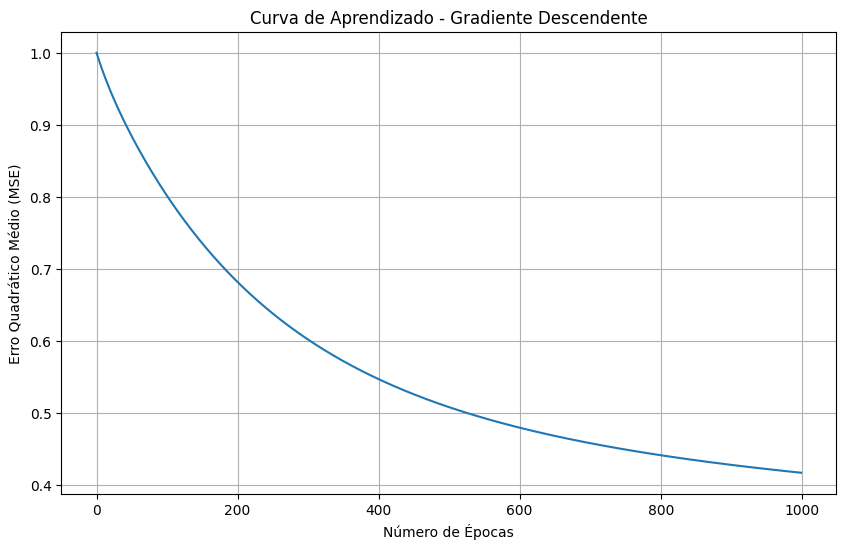

Resposta da questão 5:
MSE SGD Normalizado: 1235101618315.02
R² SGD Normalizado: 0.6483



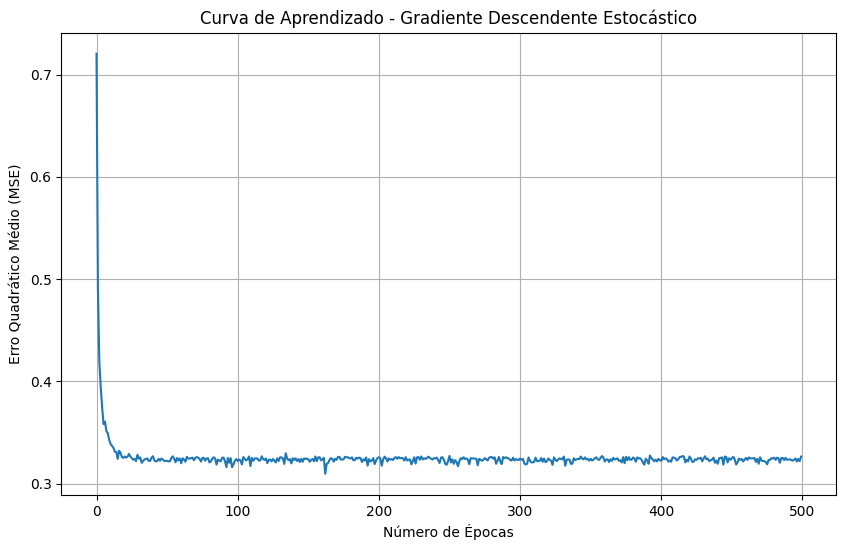

Resposta da questão 6:

Métricas das 10 execuções:
GD - MSEs: [np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963), np.float64(1440930205527.6963)]
GD - R²s: [np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954), np.float64(0.5897128408569954)]
SGD - MSEs: [np.float64(1243921254638.858), np.float64(1262804101435.3428), np.float64(1238926019572.2832), np.float64(1379129582876.631), np.float64(1233033181073.4468), np.float64(1245040106887.0625), np.float64(1241006360590.1047), np.float64(1235748228425.943), np.float64(122215262

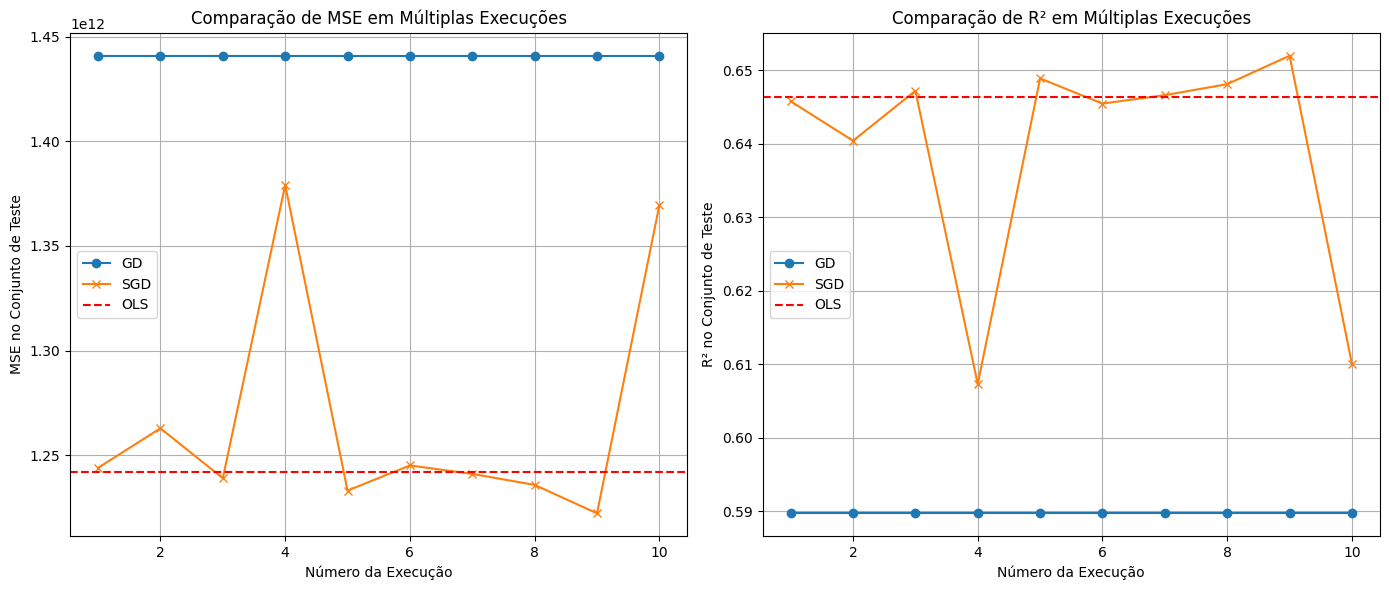

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento e pré-processamento dos dados
df = pd.read_csv('Housing.csv')

# Questão 1: Implemente o One-Hot-Encoding para as variáveis categóricas.
df = pd.get_dummies(df, drop_first=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(df.mean(), inplace=True)

y = df['price'].values.astype(float)
X = df.drop('price', axis=1).values.astype(float)

# Questão 2: Separe o conjunto de dados em treino e teste.
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))
train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Questão 3.b: Avalie o desempenho do modelo usando as métricas MSE e R² (você deve implementar essas métricas)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

# --- Implementação do Modelo OLS ---
# Questão 3.a: Implemente a regressão linear ao conjunto de dados usando o método dos mínimos quadrados (OLS).
# Adiciona uma coluna de uns para o intercepto (b0)
X_train_ols = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_ols = np.c_[np.ones(X_test.shape[0]), X_test]

XTX = X_train_ols.T @ X_train_ols
if np.linalg.det(XTX) == 0:
    theta_ols = np.linalg.pinv(XTX) @ X_train_ols.T @ y_train
else:
    theta_ols = np.linalg.inv(XTX) @ X_train_ols.T @ y_train

y_pred_ols = X_test_ols @ theta_ols
mse_ols = calculate_mse(y_test, y_pred_ols)
r2_ols = calculate_r2_score(y_test, y_pred_ols)

print("Resposta da questão 3:")
print(f"MSE OLS: {mse_ols:.2f}")
print(f"R² OLS: {r2_ols:.4f}\n")

# --- Implementação do Modelo com Gradiente Descendente (GD) ---
# Questão 4.a: Implemente a regressão linear ao conjunto de dados usando o método do
# gradiente descendente (GD). Plote a curva de aprendizagem.
def gradient_descent(X, y, alpha=0.001, epochs=500):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for i in range(epochs):
        y_pred = X @ theta
        error = y_pred - y
        gradient = (1 / m) * X.T @ error
        theta -= alpha * gradient

        cost = calculate_mse(y, y_pred)
        cost_history.append(cost)

        if np.any(np.isnan(theta)) or np.any(np.isinf(theta)):
            print(f"[GD] Instabilidade numérica detectada na época {i}.")
            break

    return theta, cost_history

# Questão 4.b: Normalize as variáveis preditivas usando o método min-max e a variável alvo
# usando o método z-score. Repita o procedimento do item A.
def normalize_features(X_train, X_test, y_train, y_test):
    # Normalização Min-Max para as features (X)
    X_min_vals = X_train.min(axis=0)
    X_max_vals = X_train.max(axis=0)
    range_vals = X_max_vals - X_min_vals
    range_vals[range_vals == 0] = 1

    X_train_normalized = (X_train - X_min_vals) / range_vals
    X_test_normalized = (X_test - X_min_vals) / range_vals

    # Normalização Z-score para o target (y)
    y_mean = y_train.mean()
    y_std = y_train.std()
    y_std = y_std if y_std != 0 else 1

    y_train_normalized = (y_train - y_mean) / y_std
    y_test_normalized = (y_test - y_mean) / y_std

    return X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized, y_mean, y_std

X_train_norm, X_test_norm, y_train_norm, y_test_norm, y_mean_norm, y_std_norm = normalize_features(
    X_train, X_test, y_train, y_test)

X_train_norm_with_bias = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]
X_test_norm_with_bias = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

theta_gd_norm, cost_history_gd = gradient_descent(X_train_norm_with_bias, y_train_norm, alpha=0.01, epochs=1000)

y_pred_gd_norm = X_test_norm_with_bias @ theta_gd_norm
y_pred_gd_denorm = y_pred_gd_norm * y_std_norm + y_mean_norm
mse_gd_norm = calculate_mse(y_test, y_pred_gd_denorm)
r2_gd_norm = calculate_r2_score(y_test, y_pred_gd_denorm)

print("Resposta da questão 4:")
print(f"MSE GD Normalizado: {mse_gd_norm:.2f}")
print(f"R² GD Normalizado: {r2_gd_norm:.4f}\n")

plt.figure(figsize=(10, 6))
plt.plot(cost_history_gd)
plt.title("Curva de Aprendizado - Gradiente Descendente")
plt.xlabel("Número de Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

# --- Implementação do Modelo com Gradiente Descendente Estocástico (SGD) ---
# Questão 5: Repita os procedimentos realizados no item 4, usando o método SGD
# (gradiente descendente estocástico) ao invés do GD.
def stochastic_gradient_descent(X, y, alpha=0.01, epochs=500):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for epoch in range(epochs):
        indices_shuffled = np.random.permutation(m)
        X_shuffled = X[indices_shuffled]
        y_shuffled = y[indices_shuffled]

        epoch_cost = 0
        for i in range(m):
            xi = X_shuffled[i, :].reshape(1, -1)
            yi = y_shuffled[i]

            prediction = xi @ theta
            error = prediction - yi
            gradient = xi.T * error
            theta -= alpha * gradient.flatten()

            if np.any(np.isnan(theta)) or np.any(np.isinf(theta)):
                print(f"[SGD] Instabilidade numérica detectada na época {epoch}.")
                break

            epoch_cost += calculate_mse(yi, prediction)

        cost_history.append(epoch_cost / m)

    return theta, cost_history

theta_sgd_norm, cost_history_sgd = stochastic_gradient_descent(X_train_norm_with_bias, y_train_norm, alpha=0.01, epochs=500)

y_pred_sgd_norm = X_test_norm_with_bias @ theta_sgd_norm
y_pred_sgd_denorm = y_pred_sgd_norm * y_std_norm + y_mean_norm
mse_sgd_norm = calculate_mse(y_test, y_pred_sgd_denorm)
r2_sgd_norm = calculate_r2_score(y_test, y_pred_sgd_denorm)

print("Resposta da questão 5:")
print(f"MSE SGD Normalizado: {mse_sgd_norm:.2f}")
print(f"R² SGD Normalizado: {r2_sgd_norm:.4f}\n")

plt.figure(figsize=(10, 6))
plt.plot(cost_history_sgd)
plt.title("Curva de Aprendizado - Gradiente Descendente Estocástico")
plt.xlabel("Número de Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

# Questão 6: Treine 10 vezes o algoritmo GD, calculando o MSE e o R² sobre o conjunto de
# teste após cada iteração. Faça o mesmo com o algoritmo SGD. Faça um gráfico
# dos valores do MSE e R² para ambos os algoritmos. Compare esses valores com
# os obtidos com o método OLS. Por que esses valores variam tanto em cada
# treinamento? Você consegue propor uma mudança nesses algoritmos que
# melhore o desempenho?

print("Resposta da questão 6:")
num_runs = 10
mse_gd_runs = []
r2_gd_runs = []
mse_sgd_runs = []
r2_sgd_runs = []

for run in range(num_runs):
    theta_gd_run, _ = gradient_descent(X_train_norm_with_bias, y_train_norm, alpha=0.01, epochs=1000)
    y_pred_gd_run_norm = X_test_norm_with_bias @ theta_gd_run
    y_pred_gd_run_denorm = y_pred_gd_run_norm * y_std_norm + y_mean_norm
    mse_gd_runs.append(calculate_mse(y_test, y_pred_gd_run_denorm))
    r2_gd_runs.append(calculate_r2_score(y_test, y_pred_gd_run_denorm))

    theta_sgd_run, _ = stochastic_gradient_descent(X_train_norm_with_bias, y_train_norm, alpha=0.01, epochs=500)
    y_pred_sgd_run_norm = X_test_norm_with_bias @ theta_sgd_run
    y_pred_sgd_run_denorm = y_pred_sgd_run_norm * y_std_norm + y_mean_norm
    mse_sgd_runs.append(calculate_mse(y_test, y_pred_sgd_run_denorm))
    r2_sgd_runs.append(calculate_r2_score(y_test, y_pred_sgd_run_denorm))

print("\nMétricas das 10 execuções:")
print(f"GD - MSEs: {mse_gd_runs}")
print(f"GD - R²s: {r2_gd_runs}")
print(f"SGD - MSEs: {mse_sgd_runs}")
print(f"SGD - R²s: {r2_sgd_runs}")
print(f"OLS - MSE: {mse_ols:.2f}, R²: {r2_ols:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_runs + 1), mse_gd_runs, marker='o', label='GD')
plt.plot(range(1, num_runs + 1), mse_sgd_runs, marker='x', label='SGD')
plt.axhline(y=mse_ols, color='r', linestyle='--', label='OLS')
plt.title("Comparação de MSE em Múltiplas Execuções")
plt.xlabel("Número da Execução")
plt.ylabel("MSE no Conjunto de Teste")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_runs + 1), r2_gd_runs, marker='o', label='GD')
plt.plot(range(1, num_runs + 1), r2_sgd_runs, marker='x', label='SGD')
plt.axhline(y=r2_ols, color='r', linestyle='--', label='OLS')
plt.title("Comparação de R² em Múltiplas Execuções")
plt.xlabel("Número da Execução")
plt.ylabel("R² no Conjunto de Teste")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
